In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

plt.rcParams['figure.figsize'] = [14,4]

In [2]:
df = pd.read_csv('/kaggle/input/ts-course-data/book_sales.csv')

In [3]:
df.head()

,Date,Paperback,Hardcover
0,2000-04-01,199,139
1,2000-04-02,172,128
2,2000-04-03,111,172
3,2000-04-04,209,139
4,2000-04-05,161,191


In [4]:
df.drop(['Paperback'],axis=1,inplace=True)

In [5]:
df.head()

,Date,Hardcover
0,2000-04-01,139
1,2000-04-02,128
2,2000-04-03,172
3,2000-04-04,139
4,2000-04-05,191


In [6]:
df = df.set_index('Date')

In [7]:
df

,Hardcover
Date,
2000-04-01,139
2000-04-02,128
2000-04-03,172
2000-04-04,139
2000-04-05,191
2000-04-06,168
2000-04-07,170
2000-04-08,145
2000-04-09,184


In [10]:
'''
y(hardcover) = w*(time)+b
'''
df['Time'] = np.arange(len(df.index))

In [11]:
df.head()

,Hardcover,Time
Date,,
2000-04-01,139,0
2000-04-02,128,1
2000-04-03,172,2
2000-04-04,139,3
2000-04-05,191,4


<Axes: xlabel='Time', ylabel='Hardcover'>

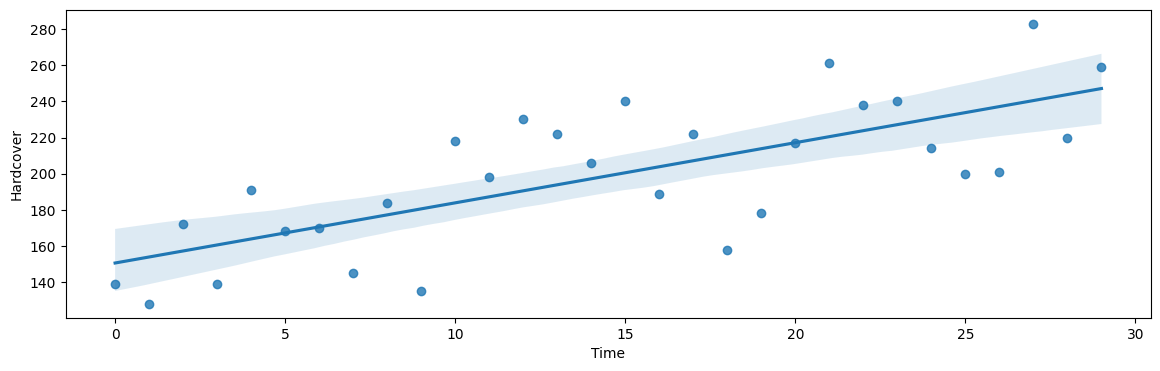

In [23]:
sns.regplot(x='Time',y='Hardcover',data=df)

In [24]:
'''
Lag Features = Extra feature column
'''

df['Lag_1'] = df['Hardcover'].shift(1)
df['Lag_2'] = df['Hardcover'].shift(2)
df.head()

'''
y(hardcover) = w*time+b

y(hardcover) = w1*time+w2*previous_day_sales+w3*previous_two_day_sales

'''

,Hardcover,Time,Lag_1,Lag_2
Date,,,,
2000-04-01,139,0,NaN,NaN
2000-04-02,128,1,139.0,NaN
2000-04-03,172,2,128.0,139.0
2000-04-04,139,3,172.0,128.0
2000-04-05,191,4,139.0,172.0


<Axes: xlabel='Lag_1', ylabel='Hardcover'>

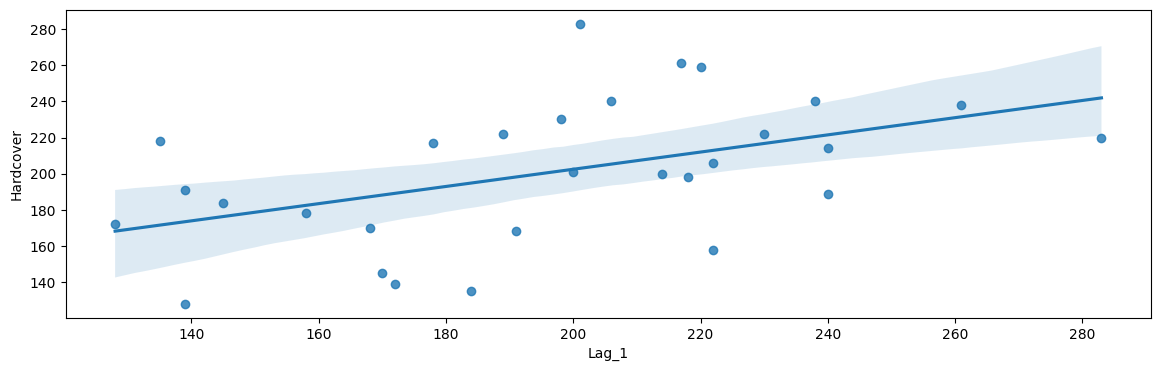

In [25]:
sns.regplot(x='Lag_1',y='Hardcover',data=df)

<Axes: xlabel='Lag_2', ylabel='Hardcover'>

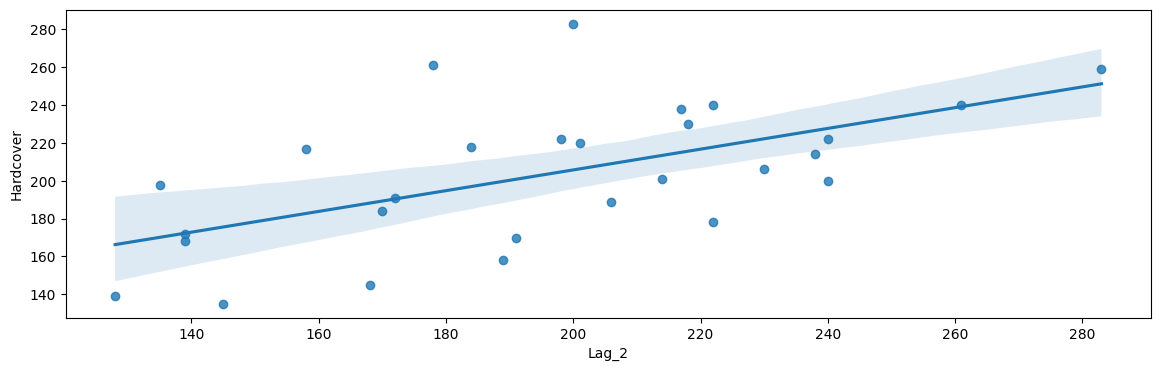

In [26]:
sns.regplot(x='Lag_2',y='Hardcover',data=df)

In [28]:
df.isnull().sum()

Hardcover    0
Time         0
Lag_1        1
Lag_2        2
dtype: int64

In [29]:
df = df.fillna(0)

In [30]:
df.head()

,Hardcover,Time,Lag_1,Lag_2
Date,,,,
2000-04-01,139,0,0.0,0.0
2000-04-02,128,1,139.0,0.0
2000-04-03,172,2,128.0,139.0
2000-04-04,139,3,172.0,128.0
2000-04-05,191,4,139.0,172.0


In [44]:
df_train = df.iloc[:20]
df_test = df.iloc[21:]

In [45]:
df_train = df_train.reset_index()
X_train = df_train.loc[:,['Time','Lag_1','Lag_2']]
y_train = df_train.loc[:,['Hardcover']]

X_test = df_test.loc[:,['Time','Lag_1','Lag_2']]
y_test = df_test.loc[:,['Hardcover']]

In [46]:
# Normalization
scaler1 = StandardScaler() #(x-u)/sigma
'''
fit : Mean value, Standard_deviation(fit)
transform : x-Mean/standard_deviation    

'''
X_train = scaler1.fit_transform(X_train)
X_test = scaler1.transform(X_test)

scaler2 = StandardScaler()
y_train = scaler2.fit_transform(y_train)
y_test = scaler2.transform(y_test)

In [48]:
X_train

array([[-1.64750894, -3.33188516, -2.5722822 ],
       [-1.47408695, -0.65017099, -2.5722822 ],
       [-1.30066495, -0.86239297, -0.40269952],
       [-1.12724296, -0.01350504, -0.57439311],
       [-0.95382097, -0.65017099,  0.11238126],
       [-0.78039897,  0.35306021, -0.40269952],
       [-0.60697698, -0.09067667,  0.40894292],
       [-0.43355498, -0.05209085,  0.04994723],
       [-0.26013299, -0.53441354,  0.08116424],
       [-0.086711  ,  0.21800986, -0.30904847],
       [ 0.086711  , -0.72734262,  0.29968336],
       [ 0.26013299,  0.87396872, -0.46513355],
       [ 0.43355498,  0.48811056,  0.83037265],
       [ 0.60697698,  1.10548361,  0.51820248],
       [ 0.78039897,  0.95114035,  1.01767475],
       [ 0.95382097,  0.64245383,  0.89280669],
       [ 1.12724296,  1.29841269,  0.64307055],
       [ 1.30066495,  0.3144744 ,  1.17375984],
       [ 1.47408695,  0.95114035,  0.37772591],
       [ 1.64750894, -0.28360574,  0.89280669]])

In [49]:
'''
Data - Train, Test
'''
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [51]:
lin_reg.predict(X_test)

array([[0.25551669],
       [0.60146688],
       [1.15357816],
       [0.91557658],
       [1.01458939],
       [0.77989786],
       [0.64270152],
       [0.48669501],
       [1.5452828 ]])

In [52]:
lin_reg.intercept_

array([3.68356662e-16])

In [54]:
lin_reg.coef_

array([[ 0.10584755, -0.11713661,  0.70150719]])

In [ ]:
W1*time+w2*lag_1+w3*lag_2+b = May1st how many hardcover sales

In [55]:
df_test

,Hardcover,Time,Lag_1,Lag_2
Date,,,,
2000-04-22,261,21,217.0,178.0
2000-04-23,238,22,261.0,217.0
2000-04-24,240,23,238.0,261.0
2000-04-25,214,24,240.0,238.0
2000-04-26,200,25,214.0,240.0
2000-04-27,201,26,200.0,214.0
2000-04-28,283,27,201.0,200.0
2000-04-29,220,28,283.0,201.0
2000-04-30,259,29,220.0,283.0


In [ ]:
2000-05-01 : 

Time = 0
Lag_1 = 259
Lag_2 = 220